# Лабораторная работа №2
# Загрузка датасета

In [23]:
#Импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder

In [24]:
data = pd.read_csv("combined_seasons.csv")

In [25]:
data.shape

(11606, 32)

In [26]:
data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,isMVP
0,0,Tariq Abdul-Wahad,SG,24,SAC,49,49,24.6,3.6,8.3,...,2.3,3.8,1.0,1.0,0.3,1.4,2.5,9.3,1998-1999,0
1,1,Shareef Abdur-Rahim,SF,22,VAN,50,50,40.4,7.7,17.9,...,5.2,7.5,3.4,1.4,1.1,3.7,2.7,23.0,1998-1999,0
2,2,Cory Alexander,PG,25,DEN,36,4,21.6,2.7,7.2,...,1.9,2.1,3.3,1.0,0.1,1.9,2.1,7.3,1998-1999,0
3,3,Ray Allen*,SG,23,MIL,50,50,34.4,6.1,13.5,...,3.1,4.2,3.6,1.1,0.1,2.4,2.3,17.1,1998-1999,0
4,4,Peter Aluma,C,25,SAC,2,0,2.5,0.5,1.0,...,0.5,1.0,0.0,0.5,0.5,1.0,2.0,1.0,1998-1999,0


In [27]:
#Проверка пропусков
data.isnull().sum()

Rk           0
Player       0
Pos          0
Age          0
Tm           0
G            0
GS           0
MP           0
FG           0
FGA          0
FG%         53
3P           0
3PA          0
3P%       1600
2P           0
2PA          0
2P%        102
eFG%        53
FT           0
FTA          0
FT%        493
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
Season       0
isMVP        0
dtype: int64

In [28]:
#Проверка типов
data.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
Season     object
isMVP       int64
dtype: object

# 1) Обработка пропусков данных

Обработку пропусков данных можно осуществить следующими способами:

### Удаление столбцов или строк, в которых есть пропуски

In [29]:
dataWithoutrows = data.dropna(axis=0, how="any")
(dataWithoutrows.shape, data.shape)

((9728, 32), (11606, 32))

In [30]:
dataWithoutcols = data.dropna(axis=1, how="any")
(dataWithoutcols.shape, data.shape)

((11606, 27), (11606, 32))

### Заполнение пропусков нулями

In [31]:
dataWithNull = data.fillna(0)
dataWithNull.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
Season    0
isMVP     0
dtype: int64

### Внедрение значений

In [32]:
nullCol= []
for col in data.columns:
    if data[data[col].isnull()].shape[0] > 0:
        nullCol.append(col)
nullData = data[nullCol]
nullData

,FG%,3P%,2P%,eFG%,FT%
0,0.435,0.286,0.443,0.442,0.691
1,0.432,0.306,0.438,0.438,0.841
2,0.373,0.286,0.432,0.431,0.841
3,0.450,0.356,0.492,0.505,0.903
4,0.500,NaN,0.500,0.500,NaN
...,...,...,...,...,...
11601,0.436,0.474,0.424,0.494,0.333
11602,0.456,0.380,0.504,0.529,0.900
11603,0.540,0.125,0.556,0.542,0.632
11604,0.567,0.000,0.593,0.567,0.776


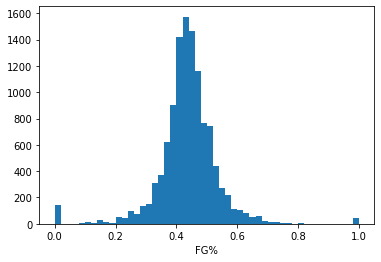

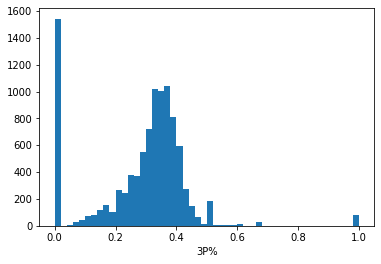

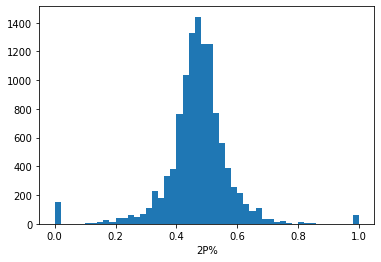

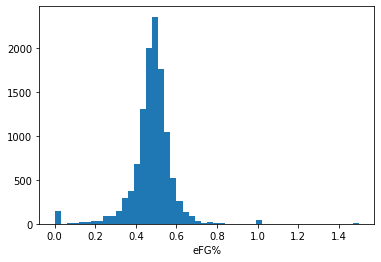

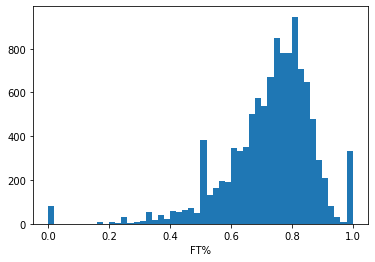

In [33]:
for col in nullData:
    plt.hist(data[col],50)
    plt.xlabel(col)
    plt.show()

In [34]:
#локальное заполнение пропусков
def test_num_impute(strategy_param, col):
    imp_num=SimpleImputer(strategy=strategy_param)
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(nullData[[col]])
    data_num_imp=imp_num.fit_transform(nullData[[col]])
    return data_num_imp[mask_missing_values_only]

In [35]:
test_num_impute("mean",nullData.columns[0])

array([0.43605791, 0.43605791, 0.43605791, 0.43605791, 0.43605791,
       0.43605791, 0.43605791, 0.43605791, 0.43605791, 0.43605791,
       0.43605791, 0.43605791, 0.43605791, 0.43605791, 0.43605791,
       0.43605791, 0.43605791, 0.43605791, 0.43605791, 0.43605791,
       0.43605791, 0.43605791, 0.43605791, 0.43605791, 0.43605791,
       0.43605791, 0.43605791, 0.43605791, 0.43605791, 0.43605791,
       0.43605791, 0.43605791, 0.43605791, 0.43605791, 0.43605791,
       0.43605791, 0.43605791, 0.43605791, 0.43605791, 0.43605791,
       0.43605791, 0.43605791, 0.43605791, 0.43605791, 0.43605791,
       0.43605791, 0.43605791, 0.43605791, 0.43605791, 0.43605791,
       0.43605791, 0.43605791, 0.43605791])

In [36]:
test_num_impute("median",nullData.columns[1])

array([0.328, 0.328, 0.328, ..., 0.328, 0.328, 0.328])

In [37]:
test_num_impute("mean",nullData.columns[2])

array([0.46879242, 0.46879242, 0.46879242, 0.46879242, 0.46879242,
       0.46879242, 0.46879242, 0.46879242, 0.46879242, 0.46879242,
       0.46879242, 0.46879242, 0.46879242, 0.46879242, 0.46879242,
       0.46879242, 0.46879242, 0.46879242, 0.46879242, 0.46879242,
       0.46879242, 0.46879242, 0.46879242, 0.46879242, 0.46879242,
       0.46879242, 0.46879242, 0.46879242, 0.46879242, 0.46879242,
       0.46879242, 0.46879242, 0.46879242, 0.46879242, 0.46879242,
       0.46879242, 0.46879242, 0.46879242, 0.46879242, 0.46879242,
       0.46879242, 0.46879242, 0.46879242, 0.46879242, 0.46879242,
       0.46879242, 0.46879242, 0.46879242, 0.46879242, 0.46879242,
       0.46879242, 0.46879242, 0.46879242, 0.46879242, 0.46879242,
       0.46879242, 0.46879242, 0.46879242, 0.46879242, 0.46879242,
       0.46879242, 0.46879242, 0.46879242, 0.46879242, 0.46879242,
       0.46879242, 0.46879242, 0.46879242, 0.46879242, 0.46879242,
       0.46879242, 0.46879242, 0.46879242, 0.46879242, 0.46879

In [38]:
 test_num_impute("median",nullData.columns[3])

array([0.486, 0.486, 0.486, 0.486, 0.486, 0.486, 0.486, 0.486, 0.486,
       0.486, 0.486, 0.486, 0.486, 0.486, 0.486, 0.486, 0.486, 0.486,
       0.486, 0.486, 0.486, 0.486, 0.486, 0.486, 0.486, 0.486, 0.486,
       0.486, 0.486, 0.486, 0.486, 0.486, 0.486, 0.486, 0.486, 0.486,
       0.486, 0.486, 0.486, 0.486, 0.486, 0.486, 0.486, 0.486, 0.486,
       0.486, 0.486, 0.486, 0.486, 0.486, 0.486, 0.486, 0.486])

In [39]:
test_num_impute("median",nullData.columns[4])

array([0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752,
       0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752,
       0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752,
       0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752,
       0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752,
       0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752,
       0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752,
       0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752,
       0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752,
       0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752,
       0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752,
       0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752,
       0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752,
       0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752,
       0.752, 0.752,

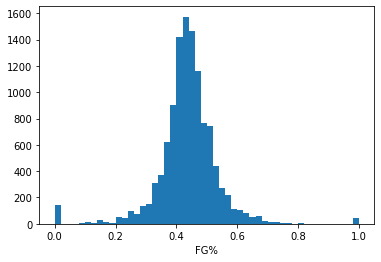

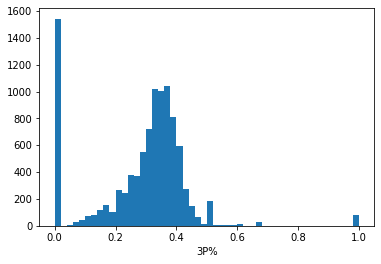

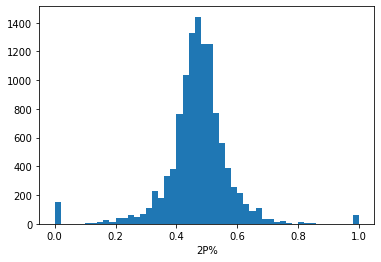

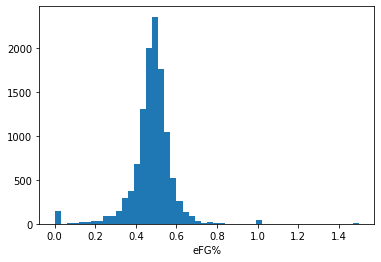

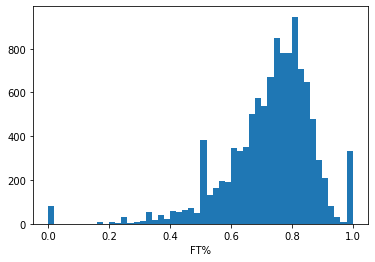

In [40]:
for col in nullData:
    plt.hist(data[col],50)
    plt.xlabel(col)
    plt.show()

# 2) Кодирование категориальных признаков

### LabelEncoder

In [41]:
data = pd.read_csv("Library_Usage.csv")

In [42]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / data.shape[0]) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Age Range. Тип данных object. Количество пустых значений 215, 0.05%.
Колонка Home Library Code. Тип данных object. Количество пустых значений 40, 0.01%.


In [43]:
data["Age Range"].unique()

array(['65 to 74 years', '55 to 59 years', '60 to 64 years',
       '45 to 54 years', '35 to 44 years', '25 to 34 years',
       '20 to 24 years', nan, '75 years and over', '0 to 9 years',
       '10 to 19 years'], dtype=object)

In [44]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(data["Age Range"])

In [45]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [46]:
le.inverse_transform([0, 1, 2, 3])

array(['0 to 9 years', '10 to 19 years', '20 to 24 years',
       '25 to 34 years'], dtype=object)

### OneHotEncoder

In [47]:
data["Home Library Code"].unique()

array(['X', 'M8', 'P7', 'S7', 'M4', 'N4', 'E9', 'C2', 'R3', 'N6', 'P9',
       'M6', 'P1', 'M2', 'P3', 'E7', 'A5', 'W2', 'I5', 'B4', 'P5', 'O7',
       'W4', 'YB', 'O2', 'G4', 'V3', 'B2', 'G6', 'G4AAA', 'YLW', 'YJJ',
       'YB9', 'YB4', 'R3J', 'XFFL', 'YB2', 'S7J', 'B4AAA', 'YB1', 'YB7',
       'YB8', 'B2AAA', 'O2AAA', 'YB3', 'XFSAA', 'M8AAA', 'N6AAA', nan,
       'C2J', 'NONE', 'M6AAA', 'YJJAA', 'E9AAA', 'P1AAA', 'YB6', 'W2AAA',
       'B2AZZ', 'M4AAA', 'P3AAA', 'N4AAA', 'I7', 'P7J', 'M2AAA', 'YLWAA',
       'O7AAA', 'S7AAA', 'YBJ', 'M6ABU', 'P7AAA', 'R3AAA', 'YB5', 'P1J',
       'YB10', 'M8J', 'N6J', 'AQUIS', 'E7J', 'W2J', 'O7J'], dtype=object)

In [26]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(data[["Home Library Code"]])

In [27]:
cat_enc_ohe.shape

(423448, 80)

In [28]:
cat_enc_ohe.todense()[1:5]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [29]:
#OHE в виде DataFrame
pd.get_dummies(data["Home Library Code"])

,A5,AQUIS,B2,B2AAA,B2AZZ,B4,B4AAA,C2,C2J,E7,...,YB5,YB6,YB7,YB8,YB9,YBJ,YJJ,YJJAA,YLW,YLWAA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3) Масштабирование данных

### MinMax масштабирование (от 0 до 1)

In [30]:
data = pd.read_csv("combined_seasons.csv")
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['MP']])

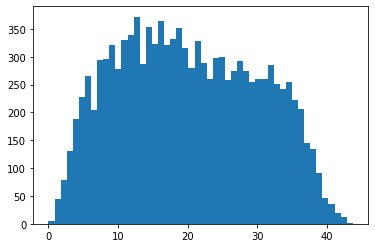

In [31]:
plt.hist(data['MP'], 50)
plt.show()

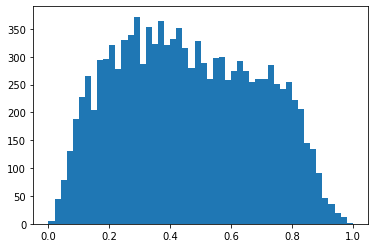

In [32]:
plt.hist(sc1_data, 50)
plt.show()

### На основе Z-оценки

In [33]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['MP']])

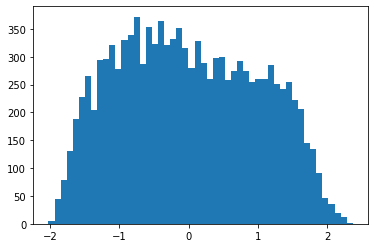

In [34]:
plt.hist(sc2_data, 50)
plt.show()